In [1]:
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.spatial import Voronoi, voronoi_plot_2d
from math import sqrt

# Import the wrapper 
from xyz_color_voronoi import color_voronoi



# Color Voronoi polygon function

Let's start with just the simplest: 4 points is the minimum for a Voronoi construction.

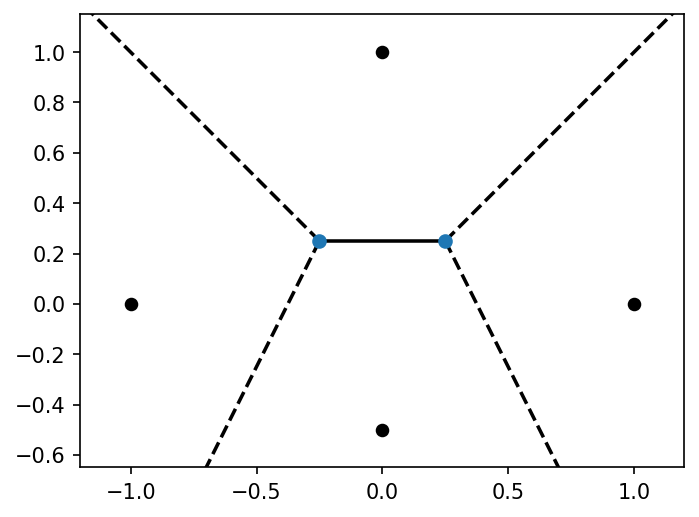

In [2]:
p4 = np.array([-1,0]), np.array([1,0]), np.array([0,1]), np.array([0,-1/2])
z = [0]*len(p4)
vor = Voronoi(p4)
fig = plt.figure()   
fig.set_dpi(150)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")

color_voronoi(vor, z, ax, 
              p_size=5.5, show_vertices=True, 
              l_width=1.7)
plt.show()

Description of Voroni obtained: all open regions. 
Imagine to prolong each segment between two points: points in space equidistant from 2 starting points.
Vertex (blue points) are conjunctions of such lines.
Line actually drawn are the convex hull of the equidistant lines: for each point, plot only the closest lines to it. (kind of, there is a mathematical formula explaining it)

Now let's create a close region!

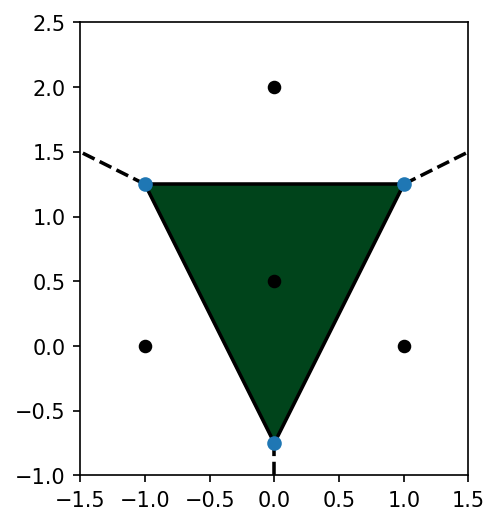

In [3]:
p4 = np.array([-1,0]), np.array([1,0]), np.array([0,2]), np.array([0,1/2])
z = [0]*len(p4)
vor = Voronoi(p4)
fig = plt.figure()   
fig.set_dpi(150)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")

color_voronoi(vor, z, ax, 
              p_size=5.5, show_vertices=True, c_code="BuGn_r",
              l_width=1.7)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1., 2.5])
plt.show()

Note that only closed Voronoi polygons are colored. Open ones, by definitions, do not defined a region and cannot be colored by this protocol.

Moving to something more regular. What are the Voronoi of a square lattice?
Let's define a uniform square grid and, just to make it a bit more funky, the $z$ coordinate is a cosine function modulated by the distance from the origin and period half side of the box $l\cdot n$, i.e.
\begin{equation}
    z_i = \cos\left(\frac{2 \pi}{ln}|r_i|\right)
\end{equation}

In [4]:
l = 1 
a, b = l*np.array([1,0]), l*np.array([0,1])
n = 10
points = [ i*a+j*b for i in range(-n, n) for j in range(-n, n)]
z = [cos(2*pi*np.linalg.norm(p)/(l*n)) for p in points]
vor = Voronoi(points)

And plot it!

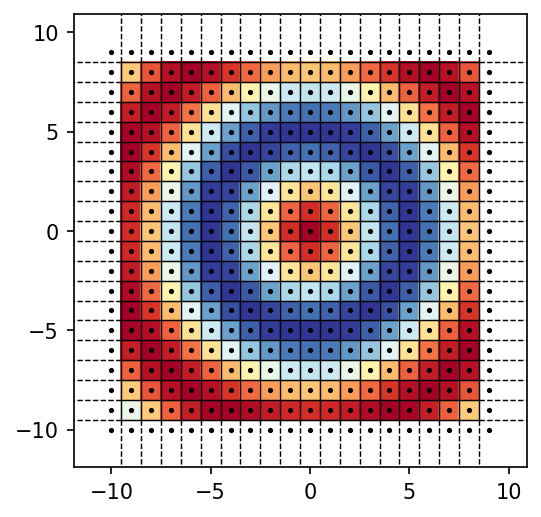

In [5]:
fig = plt.figure()   
fig.set_dpi(150)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")

color_voronoi(vor, z, ax, 
              p_size=1.5, show_vertices=False, 
              l_width=0.7, l_alpha=1.)
plt.show()

Voronoi polygons of squars are squar. A bit boring.
What happens if we introduce defects in the lattice?

Deleting point [333 367  95 322  67]
395 400


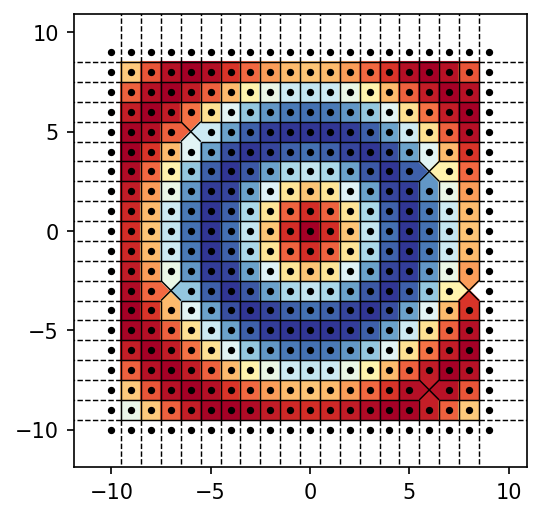

In [6]:
del_pos = np.random.randint(0, high=len(points), size=5)
print("Deleting point", del_pos)
p_defect = [p for i, p in enumerate(points) if i not in del_pos]
z_defect = [cos(2*pi*np.linalg.norm(p)/n) for p in p_defect]
vor = Voronoi(p_defect)
print(len(p_defect), len(points))
fig = plt.figure()   
fig.set_dpi(150)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")

color_voronoi(vor, z_defect, ax,
              p_size=2.5, show_vertices=False, 
              l_width=0.7, l_alpha=1.)
plt.show()

Can you spot the defects? Defects change the coordination of the points and, thus, the number of sides of the Voronoi polygons.

Still not that cool, what about noise in the positions of the lattice?

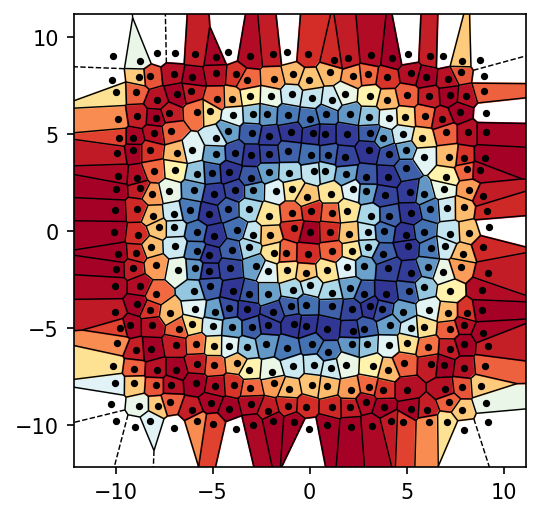

In [7]:
# Random noise
amp = 0.25*l # Amplidute in term of lattice spacing
p_noise = [p+np.random.uniform(low=-amp, high=amp, size=[2]) 
           for p in p_defect]
z_noise = [cos(2*pi*np.linalg.norm(p)/n) for p in p_defect]
vor = Voronoi(p_noise)
fig = plt.figure()   
fig.set_dpi(150)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")

color_voronoi(vor, z_defect, ax,
              p_size=2.5, show_vertices=False, 
              l_width=0.7, l_alpha=1.)
plt.show()

Now the same joke can be done on different type of lattices of course.
Well, in 2D is mostly hexagonal and square, if you leave out the basis.

Let's do it all in one take, as a summary. And colour the points with a Gaussian. Just for the sake of it.

In [8]:
# Define the lattice
l = 2 # Spacing
a, b = l*np.array([1,0]), l*np.array([-1/2,sqrt(3)/2]) # Hexagonal lattice
n = 10 # Repetitions along the lattice vectors

n_def = 3 # Number of defects
del_pos = np.random.randint(0, high=n**2, size=n_def) # Pick defects
print("Deleting points ", del_pos)
amp = 0.10*l # Amplidute of noise in term of lattice spacing

# Get lattice points
points_hex = [i*a+j*b+np.random.uniform(low=-amp, high=amp, size=[2])  
              for i in range(-n, n) 
              for j in range(-n, n)
              if 2*(n+i)*n+(n+j) not in del_pos
             ]
# Color the points
z = [exp(-np.linalg.norm(p)**2/(2*(l*n)**2)) for p in points_hex]

Deleting points  [56 72  7]


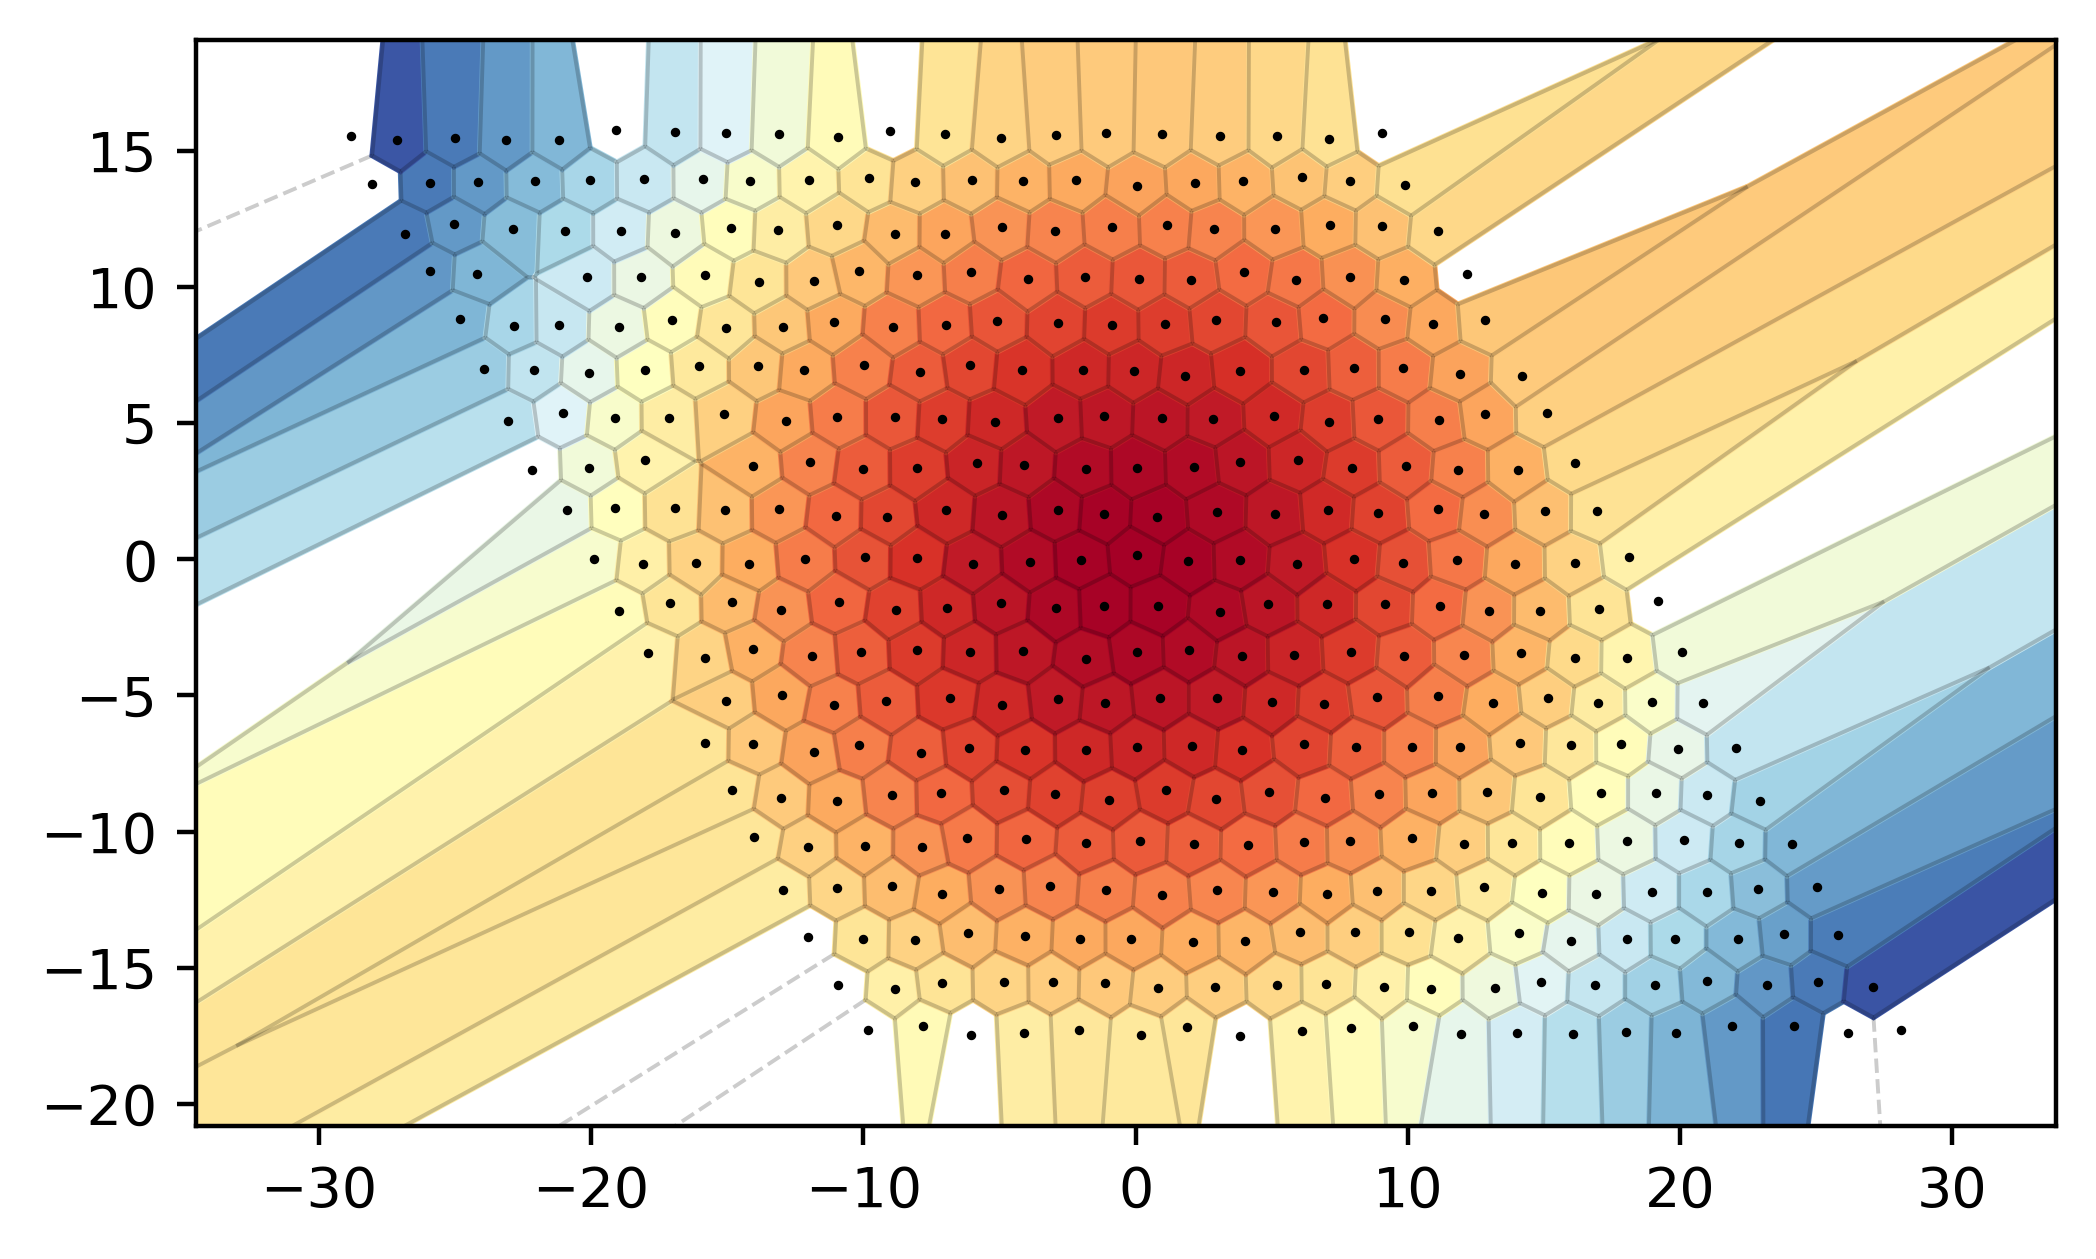

In [9]:
# Get Vornoi diagram of the system
vor = Voronoi(points_hex)
# Plot it all!
fig = plt.figure()   
fig.set_dpi(400)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")
# Call the magic funcion
color_voronoi(vor, z, ax,
              p_size=0.7, show_vertices=False, 
              l_width=0.7, l_alpha=0.2)

cheat = False
if cheat:
    dcut = l*(1+amp+1e-2) # This is maximum distance possible between nn due to noise.
    # For each point, save list of nearest neighbours.
    nn = {x: [] for x in range(len(points_hex))}
    for i, p in enumerate(points_hex): 
        for j in range(i+1, len(points_hex)):
            p1 = points_hex[j]                                                               
            d = np.linalg.norm(p-p1)
            if d <= dcut:
                nn[i].append(j)
    # For each point
    for i in nn.keys():
        # Go through its nn
        for j in nn[i]:
            # And plot line connecting point and current nn
            plt.plot(get_x([points_hex[i], points_hex[j]]), 
                     get_y([points_hex[i], points_hex[j]]), 
                     '-', ms=0., linewidth=0.4, c='gray')

plt.show()

## Fun game: spot the defect!

Unless you cranked it, the noies is not big enough to change the coordination of a lattice point. But defects will leave some element undercoordinated: look for the pentagons!

If you are in truble, try to turn to True the <b>cheat</b> variable. It will connect the point to their nearest neighbours: defect should show up as holes in the lattice network of 6-fold connected points.

Let's finish with a completely random and super colorful case: random point uniformly distributed in the plane and random noise for each of them.

In [10]:
n = 100
points = np.random.uniform(size=[n, 2])
speed = np.random.uniform(low=0.0, high=5.0, size=n)
vor = Voronoi(points)

And now let's enjoy the colors!
Define a figure and get a sublot axis. Set the aspect to equal so that the angles are not distorted.

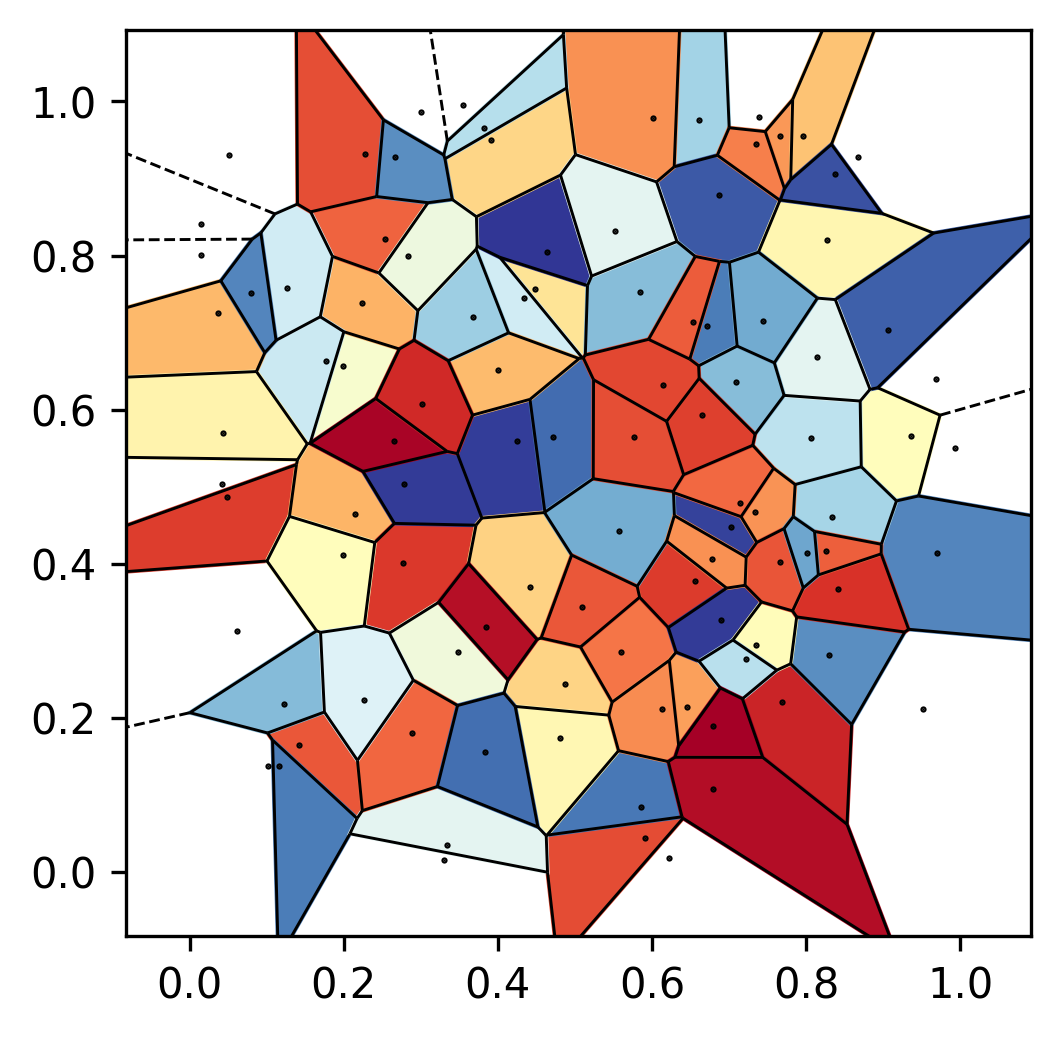

In [11]:
fig = plt.figure()   
fig.set_dpi(300)
ax = fig.add_subplot(111)              
ax.set_aspect("equal")

color_voronoi(vor, speed, ax, 
              p_size=0.5, show_vertices=False, 
              l_width=0.7, l_alpha=1.)
plt.show()

# Color Voronoi diagram of xyz

Note that you can call these function directly from bash using the wrapper.
Geometry is given as xyz file: no useless complications from PBC.

In [12]:
from xyz_color_voronoi import xyz_color_vornoi

[ INFO - xyz_color_vornoi] Reading colors...
[ INFO - xyz_color_vornoi] Load xy position via ASE...
[ INFO - xyz_color_vornoi] Computing Voronoi via scipy-qhull...
[ INFO - xyz_color_vornoi] Plotting at 800 dpi


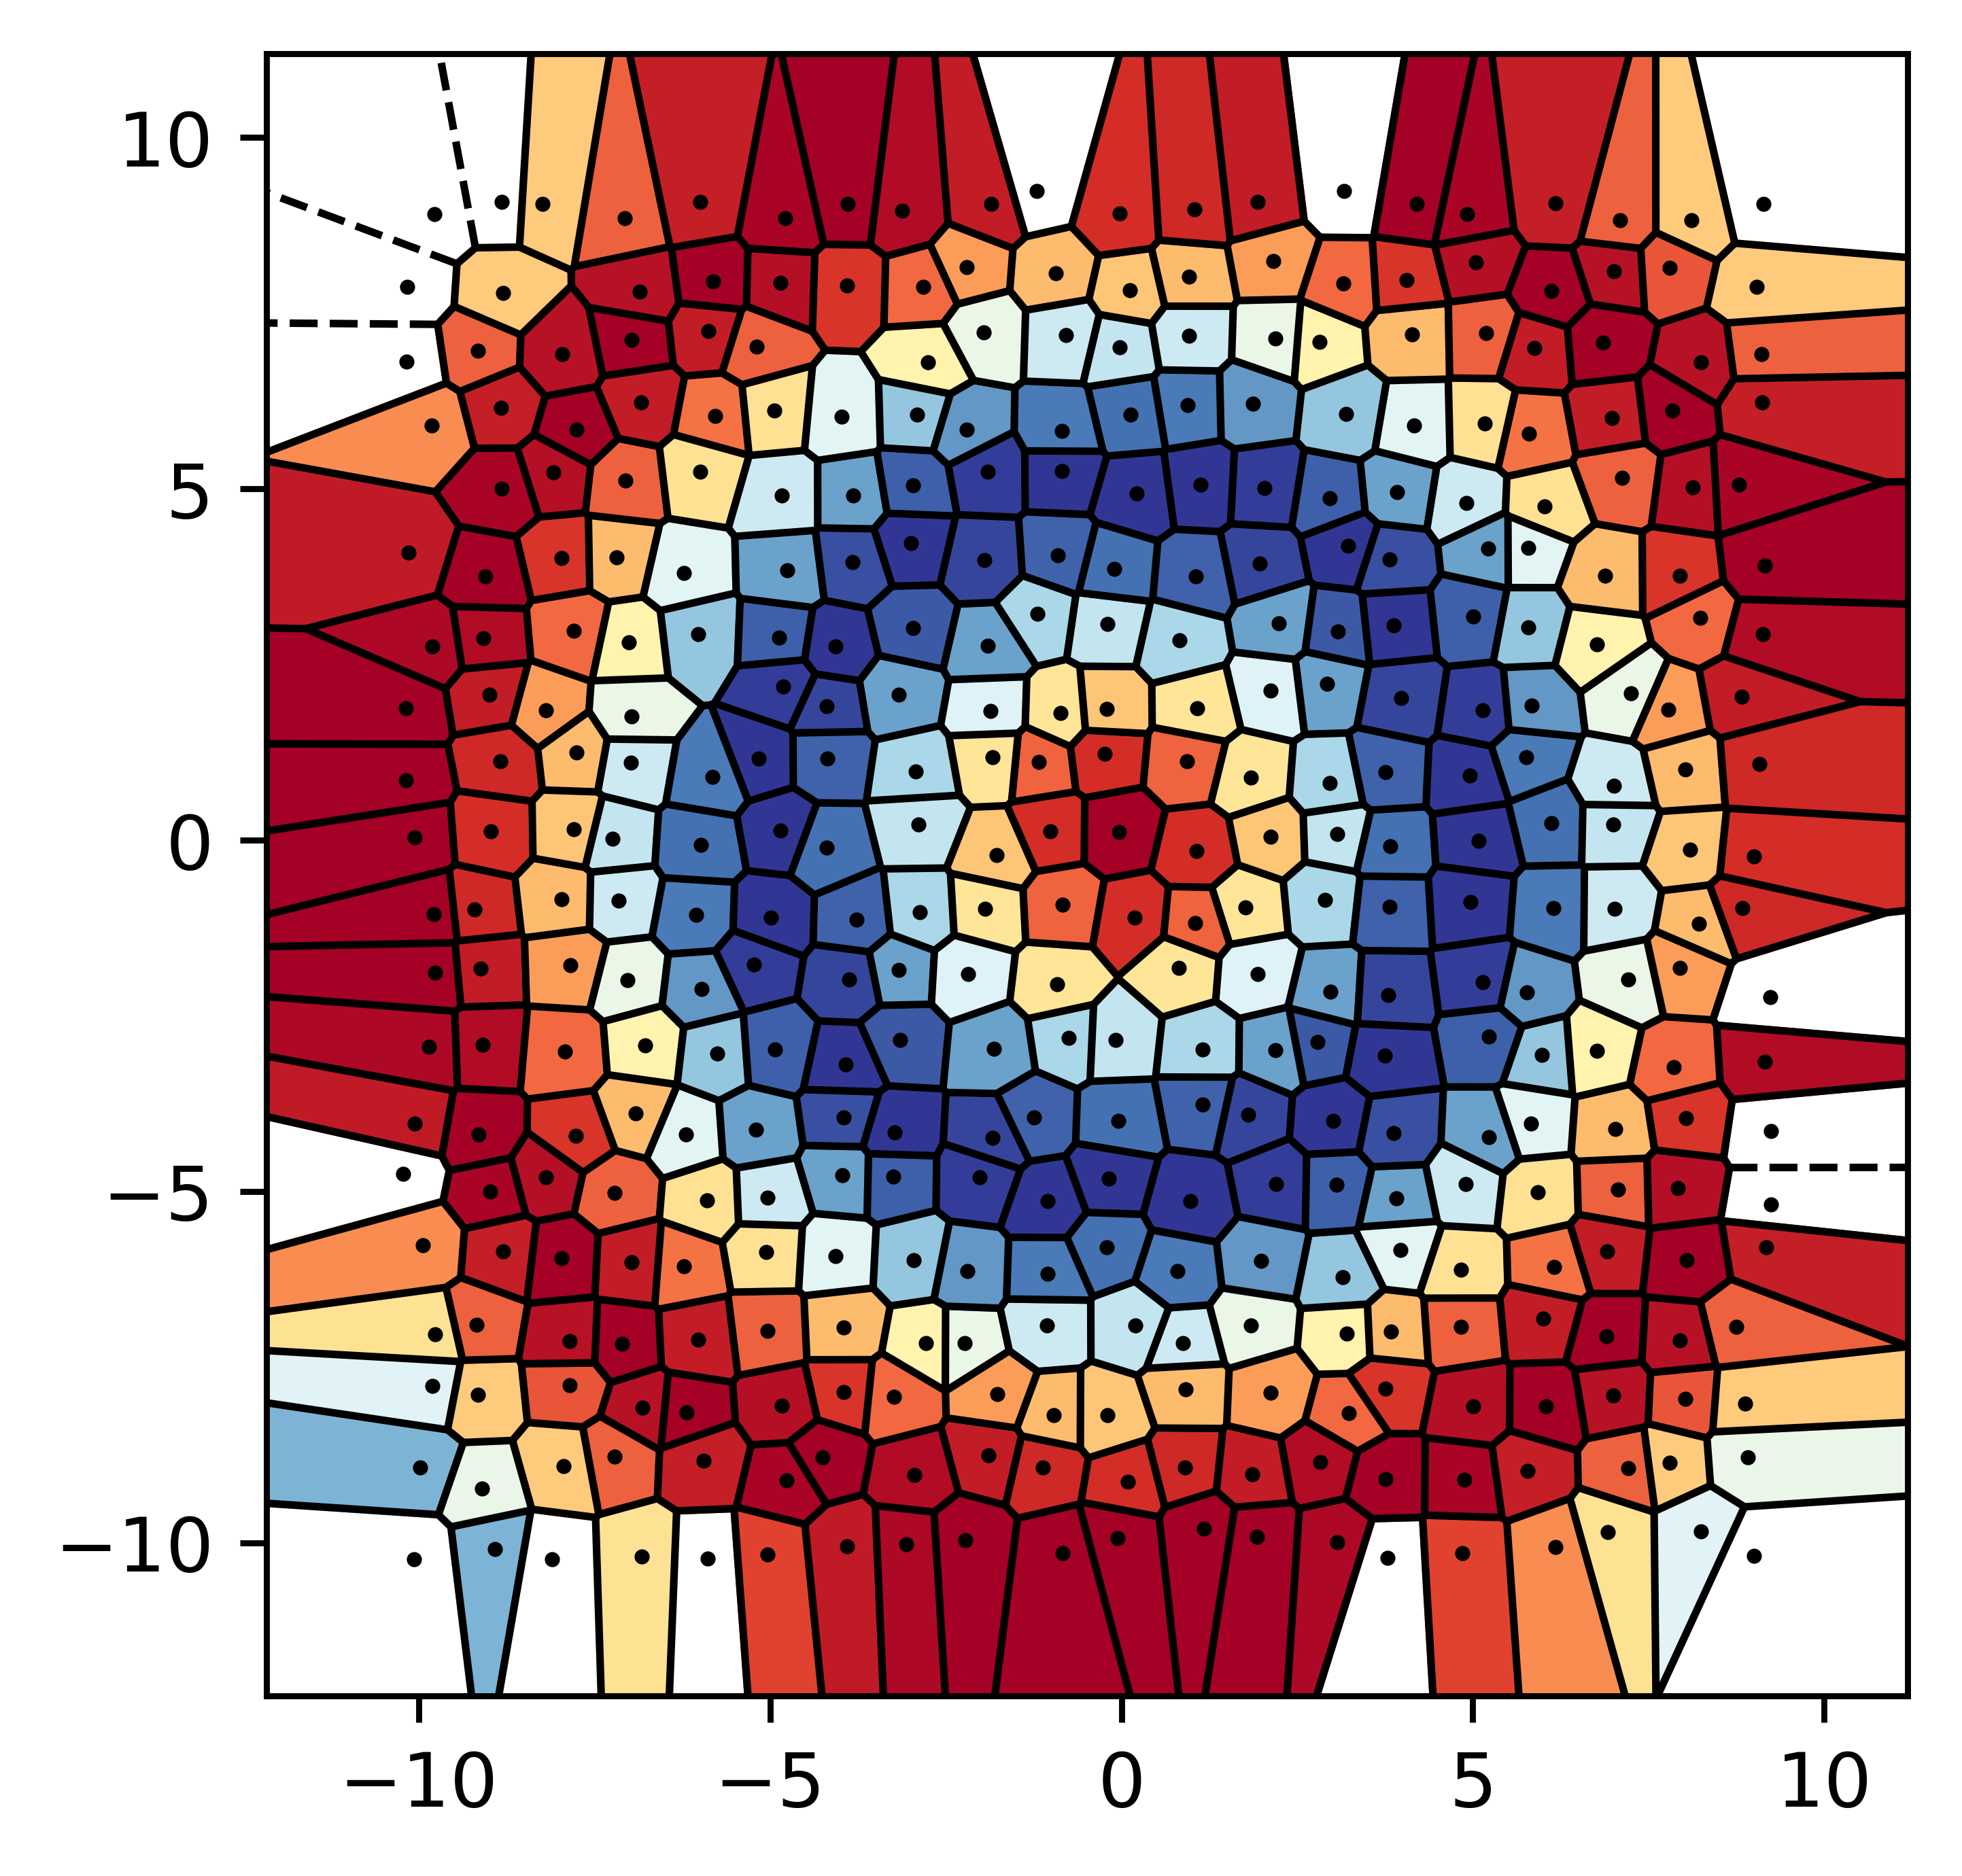

0

In [13]:
xyz_color_vornoi(["test/test.sq_noise_defect.xyz"])